In [1]:
# Import libarys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [30]:
# Import the dataset
root = '/Users/Haydn/Documents/Code/Jupyter/Machine Learning A-Z/1.0 - Example Data/'
data_file = root + 'Part 2 - Regression/Polynomial Regression/Position_Salaries.csv'
dataset = pd.read_csv(data_file)
'''
So this data set shows the levels of employess and the salary you
get at that level.

So now when we hire emplyees we can check them against our salary curve.
E.g - An Regional Manager with two yrs experience on their way to Partner.
      We can say they're 6.5 and check the salary on our graph.
''' 
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


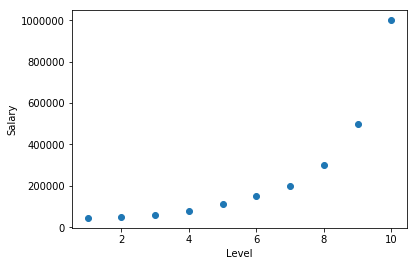

In [3]:
# Splitting features and outcomes
x = dataset.iloc[:, :2].values
y = dataset.iloc[:, -1:].values

plt.scatter(x[:, 1], y[:, 0])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [4]:
# We don't need to split the training and test data here as
# we want all the data to be able to plot the graph. Removing 
# data will only make the model less accurate.

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# print('X Training Size: %s\n' % len(x_train), x_train, '\nX Test Size: %s\n' % len(x_test), x_test, '\nY Training Size: %s\n' % len(y_train), y_train, '\nY Test Size: %s\n' % len(y_test), y_test)

In [5]:
# Lets make a linear regression - just so we can compare
linear = LinearRegression().fit(x[:, 1:], y)

In [6]:
# Polynomial regression
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x[:, 1:])
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [7]:
poly_regression = LinearRegression().fit(x_poly, y)

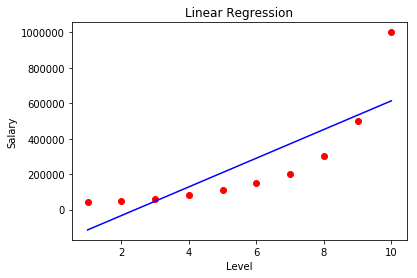

In [8]:
# Visualise the results - linear
plt.scatter(x[:, 1:], y, color="red")
plt.plot(x[:, 1:], linear.predict(x[:, 1:]), color="blue")
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

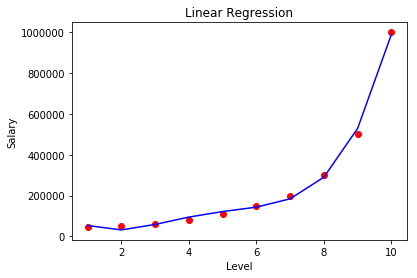

In [9]:
# Visualise the results - Poly (Changing the degree in PolynomialFeatures affects alot!!)
plt.scatter(x[:, 1:], y, color="red")
plt.plot(x[:, 1:], poly_regression.predict(poly.fit_transform(x[:, 1:])), color="blue")
plt.title("Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [29]:
# Lets test to see if someone lies or not about the salary they got and level they were...
yrs_exp = 6.5
linear_salary = linear.predict([[yrs_exp]])
poly_salary = poly_regression.predict(poly.fit_transform([[yrs_exp]]))
print('Employee with %s yrs exp should have a salary of: \nLinear Regression %.2f \nPoly Regression %.2f.' % (yrs_exp, linear_salary[0][0], poly_salary[0][0]))


Employee with 6.5 yrs exp should have a salary of: 
Linear Regression 330378.79 
Poly Regression 158862.45.
